##                                    Описание проекта                                                        ##
Мы работаем в IT-компании, которая выполняет на заказ проекты по машинному обучению. К нам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
Поэтому он просит нас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Нам нужно создать две прогнозные модели для отбора бурёнок в поголовье: 

### Описание данных 
Мы будем работать c тремя датасетами:

ferma_main.csv

ferma_dad.csv

cow_buy.csv

Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. 

Описание данных:

id — уникальный идентификатор коровы.

Удой, кг — масса молока, которую корова даёт в год (в килограммах).

ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.

Сырой протеин, г — содержание сырого протеина в корме (в граммах).

СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.

Порода — порода коровы.

Тип пастбища — ландшафт лугов, на которых паслась корова.

порода папы_быка — порода папы коровы.

Жирность,% — содержание жиров в молоке (в процентах).

Белок,% — содержание белков в молоке (в процентах).

Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).

Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Признаки в датасете ferma_main.csv можно разделить на группы.

Характеристики коровы: id, Порода, порода папы_быка, Возраст.

Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).

Характеристика пастбища: Тип пастбища.

Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.

Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.

Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:

id — уникальный идентификатор коровы.

Имя Папы — имя папы коровы.

Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:

Порода — порода коровы.

Тип пастбища — ландшафт лугов, на которых паслась корова.

порода папы_быка — порода папы коровы.

Имя_папы — имя папы коровы.

Текущая_жирность,% — содержание жиров в молоке (в процентах).

Текущий_уровень_белок,% — содержание белков в молоке (в процентах).

Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.

Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.

Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют.

Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.

Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!

## Загрузка данных

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
from scipy import stats as st
import numpy as np
import seaborn as sns
!pip install phik -q
import phik
!pip install scikit-learn==1.5.0
import sklearn

df_ferma = pd.read_csv('/datasets/ferma_main.csv', sep=';')
df_ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
df_ferma_min = pd.read_csv('/datasets/cow_buy.csv', sep=';')

     |████████████████████████████████| 13.4 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 107.1 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


#### Изучим общую информацию о данных.


In [2]:
df_ferma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

*Выведем первые 10 строк таблицы*

In [3]:
df_ferma.head(10)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет
5,6,5254,"12,7",1806,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,13","3,078",вкусно,менее_2_лет
6,7,5910,"13,2",1792,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,48","3,077",вкусно,более_2_лет
7,8,6179,"14,7",1806,"0,93",Вис Бик Айдиал,Равнинные,Айдиал,"3,55","3,076",вкусно,более_2_лет
8,9,6783,"14,2",1918,"0,94",РефлешнСоверинг,Холмистое,Айдиал,"3,71","3,077",вкусно,более_2_лет
9,10,5339,"13,4",1791,"0,895",Вис Бик Айдиал,Холмистое,Соверин,"3,13","3,075",вкусно,менее_2_лет


**Приведем столбцы к нижнему регистру и уберем пробелы в названиях столбцов**

In [4]:
df_ferma.columns = df_ferma.columns.str.lower()

In [5]:
df_ferma.columns

Index(['id', 'удой, кг', 'эке (энергетическая кормовая единица)',
       'сырой протеин, г', 'спо (сахаро-протеиновое соотношение)', 'порода',
       'тип пастбища', 'порода папы_быка', 'жирность,%', 'белок,%',
       'вкус молока', 'возраст'],
      dtype='object')

In [6]:
df_ferma = df_ferma.rename(columns={'эке (энергетическая кормовая единица)': 'эке', 'спо (сахаро-протеиновое соотношение)': 'спо'})

In [7]:
df_ferma.head()

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы_быка,"жирность,%","белок,%",вкус молока,возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [8]:
df_ferma[df_ferma[['удой, кг', 'порода', 'тип пастбища', 'порода папы_быка', 'вкус молока', 'возраст']].duplicated(keep=False)]
# Посмотрим есть ли дубликаты по данным стобцам

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы_быка,"жирность,%","белок,%",вкус молока,возраст
96,97,6267,"15,2",2088,"0,93",Вис Бик Айдиал,Холмистое,Соверин,"3,71","3,073",вкусно,более_2_лет
102,103,6248,"15,9",2196,"0,93",Вис Бик Айдиал,Равнинное,Соверин,"3,71","3,072",не вкусно,более_2_лет
106,107,5417,"13,2",1848,"0,89",Вис Бик Айдиал,Холмистое,Соверин,"3,57","3,076",вкусно,менее_2_лет
132,133,6267,"13,9",2246,"0,94",Вис Бик Айдиал,Холмистое,Соверин,"3,73","3,075",вкусно,более_2_лет
136,137,6081,"14,7",2238,"0,94",Вис Бик Айдиал,Холмистое,Айдиал,"3,58","3,078",вкусно,более_2_лет
139,140,5833,"14,1",1977,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,078",вкусно,более_2_лет
141,142,6502,"16,1",1791,"0,94",Вис Бик Айдиал,Равнинное,Соверин,"3,74","3,078",не вкусно,более_2_лет
173,174,5342,"13,7",1994,"0,86",Вис Бик Айдиал,Холмистое,Соверин,"3,42","3,074",вкусно,менее_2_лет
181,182,6502,"16,5",2324,"0,95",Вис Бик Айдиал,Равнинное,Соверин,"3,74","3,079",не вкусно,более_2_лет
184,185,6112,"15,8",1833,"0,94",Вис Бик Айдиал,Равнинное,Соверин,"3,71","3,077",вкусно,более_2_лет


In [9]:
df_ferma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                634 non-null    int64 
 1   удой, кг          634 non-null    int64 
 2   эке               634 non-null    object
 3   сырой протеин, г  634 non-null    int64 
 4   спо               634 non-null    object
 5   порода            634 non-null    object
 6   тип пастбища      634 non-null    object
 7   порода папы_быка  634 non-null    object
 8   жирность,%        634 non-null    object
 9   белок,%           634 non-null    object
 10  вкус молока       634 non-null    object
 11  возраст           634 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.6+ KB


In [10]:
df_ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


*Также выведем первые 10 строк таблицы*

In [11]:
df_ferma_dad.head(10)


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


In [12]:
df_ferma_dad.columns = df_ferma_dad.columns.str.lower()

In [13]:
df_ferma_dad

,id,имя папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
...,...,...
624,625,Буйный
625,626,Барин
626,627,Барин
627,628,Барин


**Изучим третью таблицу и выведем первые 10 строк таблицы**

In [14]:
df_ferma_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [15]:
df_ferma_min.head(10)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


In [16]:
df_ferma_min.columns = df_ferma_min.columns.str.lower()

**После изучения таблиц можно сделать вывод, что в первом и третьем датафреймах есть пропуски. Типы данных во всех таблицах одинаковые и имеют тип данных - object. Необходимо поменять типы данных в столбцах. Вывод - данные требуют предобработки**







##  Предобработка данных 

**найдем дубликаты поочередно в каждой таблице методом duplicated().sum()**



In [17]:
df_ferma.duplicated().sum()


5

**Видим, что первом датафрейме 5 явных дубликатов, которые можно удалить**

In [18]:
df_ferma = df_ferma.drop_duplicates()

**Проверка**

In [19]:
df_ferma.duplicated().sum()

0

In [20]:
df_ferma_dad.duplicated().sum()

0

In [21]:
df_ferma_min.duplicated().sum()

4

**Найдем дубликаты по породе, тип пастбища, порода папы быка и имя папы**

In [22]:
df_ferma_min[df_ferma_min[['порода', 'тип пастбища', 'порода папы_быка', 'имя_папы']].duplicated(keep=False)]

,порода,тип пастбища,порода папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


**Полных дубликатов нет, поэтому оставим все, как есть**

In [23]:
df_ferma_min.duplicated().sum()

4

**изменим тип данных на float() в столбцах (эке (энергетическая кормовая единица), спо (сахаро-протеиновое соотношение), жирность% и белок% датафрейма df_ferma**

In [24]:
df_ferma = df_ferma.rename(columns={'эке (энергетическая кормовая единица)': 'эке', 'спо (сахаро-протеиновое соотношение)': 'спо', 'сырой протеин,г': 'сырой_протеин,г', 'порода папы_быка': 'порода_папы_быка', 'тип пастбища': 'тип_пастбища', 'вкус молока': 'вкус_молока'})
df_ferma.columns
   


Index(['id', 'удой, кг', 'эке', 'сырой протеин, г', 'спо', 'порода',
       'тип_пастбища', 'порода_папы_быка', 'жирность,%', 'белок,%',
       'вкус_молока', 'возраст'],
      dtype='object')

In [25]:
df_ferma['эке'] = df_ferma['эке'].str.replace(',', '.').astype(float)
df_ferma.dtypes
         



id                    int64
удой, кг              int64
эке                 float64
сырой протеин, г      int64
спо                  object
порода               object
тип_пастбища         object
порода_папы_быка     object
жирность,%           object
белок,%              object
вкус_молока          object
возраст              object
dtype: object

In [26]:
df_ferma['эке'].isna().sum()

0

In [27]:
df_ferma['спо'] = df_ferma['спо'].str.replace(',', '.').astype(float)
df_ferma.dtypes
         

id                    int64
удой, кг              int64
эке                 float64
сырой протеин, г      int64
спо                 float64
порода               object
тип_пастбища         object
порода_папы_быка     object
жирность,%           object
белок,%              object
вкус_молока          object
возраст              object
dtype: object

In [28]:
df_ferma['спо'].isna().sum()

0

In [29]:
df_ferma['жирность,%'] = df_ferma['жирность,%'].str.replace(',','.').astype(float)
df_ferma.dtypes
         

id                    int64
удой, кг              int64
эке                 float64
сырой протеин, г      int64
спо                 float64
порода               object
тип_пастбища         object
порода_папы_быка     object
жирность,%          float64
белок,%              object
вкус_молока          object
возраст              object
dtype: object

In [30]:
df_ferma['спо'].isna().sum()

0

In [31]:
df_ferma['белок,%'] = df_ferma['белок,%'].str.replace(',','.').astype(float)
df_ferma.dtypes
         

id                    int64
удой, кг              int64
эке                 float64
сырой протеин, г      int64
спо                 float64
порода               object
тип_пастбища         object
порода_папы_быка     object
жирность,%          float64
белок,%             float64
вкус_молока          object
возраст              object
dtype: object

**Видим что тип данных в числовых столбцах  изменился на нужный float()**

In [32]:
df_ferma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                629 non-null    int64  
 1   удой, кг          629 non-null    int64  
 2   эке               629 non-null    float64
 3   сырой протеин, г  629 non-null    int64  
 4   спо               629 non-null    float64
 5   порода            629 non-null    object 
 6   тип_пастбища      629 non-null    object 
 7   порода_папы_быка  629 non-null    object 
 8   жирность,%        629 non-null    float64
 9   белок,%           629 non-null    float64
 10  вкус_молока       629 non-null    object 
 11  возраст           629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.9+ KB


**Найдем пропущенные значения в каждой таблице**

In [33]:
df_ferma.isna().sum()

id                  0
удой, кг            0
эке                 0
сырой протеин, г    0
спо                 0
порода              0
тип_пастбища        0
порода_папы_быка    0
жирность,%          0
белок,%             0
вкус_молока         0
возраст             0
dtype: int64

In [34]:
df_ferma_dad.isna().sum()

id          0
имя папы    0
dtype: int64

In [35]:
df_ferma_min.isna().sum()

порода                     0
тип пастбища               0
порода папы_быка           0
имя_папы                   0
текущая_жирность,%         0
текущий_уровень_белок,%    0
возраст                    0
dtype: int64

**Видим, что пропущенных значений нету**

## Исследовательский анализ данных

**Проведем статистический анализ таблицы df_ferma с помощью метода describe()**

In [36]:
df_ferma.describe()


,id,"удой, кг",эке,"сырой протеин, г",спо,"жирность,%","белок,%"
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


**Из данных видно, что средний удой коров составляет 6188 кг, медиана чуть меньше - 6133 кг. Максимальный удой 45616 кг, что скорее всего является аномальным значенем. Построим график  числовых  и категориальных столбцов для наглядности. Для этого создадим для удобства отдельно 2 переменных с количественными признаками и с категориальными.**

**Создадим для удобства отдельно 2 переменных с количественными признаками и с категориальными.**

In [37]:
df_ferma_num = df_ferma[['удой, кг', 'эке', 'сырой протеин, г', 'спо',  'жирность,%', 'белок,%']]
df_ferma_num

,"удой, кг",эке,"сырой протеин, г",спо,"жирность,%","белок,%"
0,5863,14.2,1743,0.890,3.58,3.076
1,5529,12.8,2138,0.890,3.54,3.079
2,5810,14.0,1854,0.885,3.59,3.074
3,5895,12.4,2012,0.885,3.40,3.075
4,5302,12.8,1675,0.885,3.73,3.073
...,...,...,...,...,...,...
624,6812,15.4,1964,0.940,3.74,3.075
625,5513,12.9,1700,0.880,3.64,3.073
626,5970,14.4,1837,0.880,3.64,3.075
627,5746,13.8,1994,0.890,3.64,3.077


In [38]:
df_ferma_cat = df_ferma[['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']]
df_ferma_cat

,порода,тип_пастбища,порода_папы_быка,вкус_молока,возраст
0,Вис Бик Айдиал,Равнинное,Айдиал,вкусно,более_2_лет
1,Вис Бик Айдиал,Равнинные,Соверин,вкусно,менее_2_лет
2,РефлешнСоверинг,Холмистое,Соверин,не вкусно,более_2_лет
3,РефлешнСоверинг,Холмистое,Айдиал,не вкусно,более_2_лет
4,Вис Бик Айдиал,Равнинные,Соверин,вкусно,менее_2_лет
...,...,...,...,...,...
624,РефлешнСоверинг,Равнинное,Айдиал,не вкусно,более_2_лет
625,РефлешнСоверинг,Равнинное,Соверин,вкусно,менее_2_лет
626,РефлешнСоверинг,Холмистое,Соверин,не вкусно,более_2_лет
627,РефлешнСоверинг,Равнинное,Соверин,вкусно,более_2_лет


**Построим графики используя цикл for**

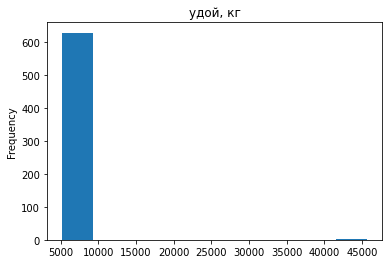

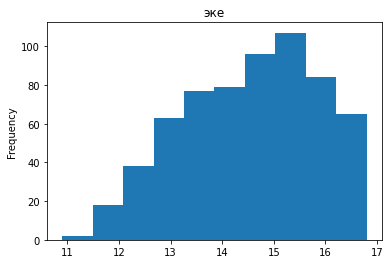

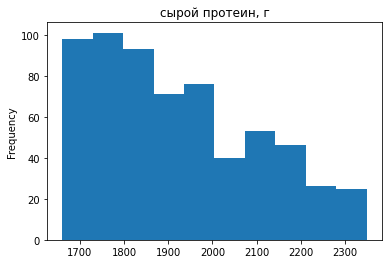

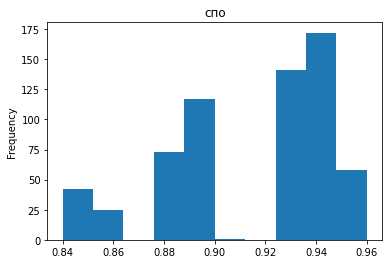

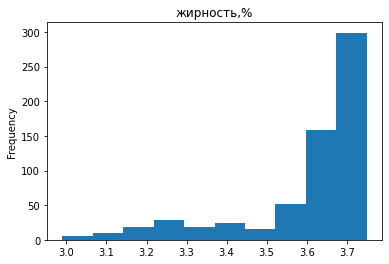

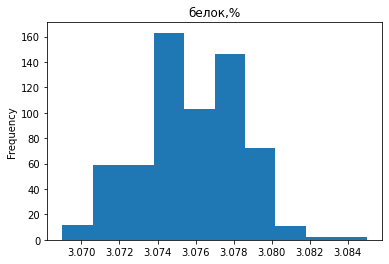

In [39]:
for column in df_ferma_num.columns:
    plt.figure()
    df_ferma_num[column].plot(kind='hist', title=column)
    plt.show()

**В целом можно сказать, что количественные признаки распределены нормально. Выбросы есть только у признаков белок и жирность**

**Построим графики для категориальных переменных**

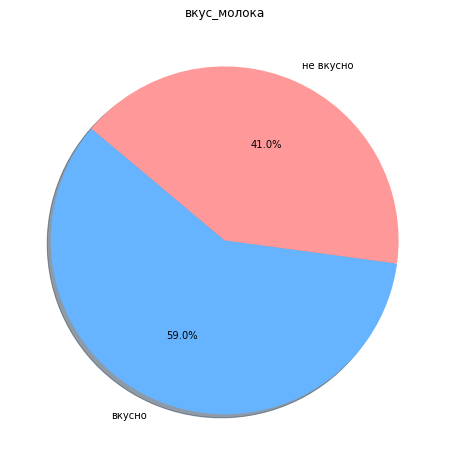

In [40]:
value_counts = df_ferma['вкус_молока'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels = value_counts.index, colors=['#66b3ff', '#ff9999'], startangle=140, shadow=True, autopct='%1.1f%%')
plt.title('вкус_молока')
plt.show()

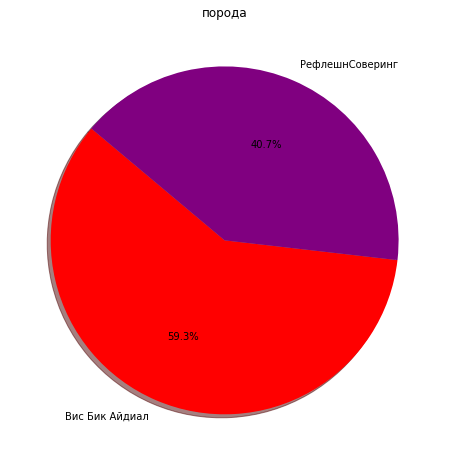

In [41]:
value_counts = df_ferma['порода'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels = value_counts.index, colors=['red','purple'], startangle=140, shadow=True, autopct='%1.1f%%')
plt.title('порода')
plt.show()

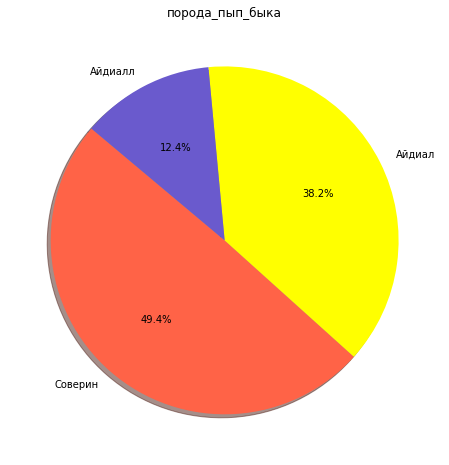

In [42]:
value_counts = df_ferma['порода_папы_быка'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels = value_counts.index, colors=['tomato', 'yellow', 'SlateBlue'], startangle=140, shadow=True, autopct='%1.1f%%')
plt.title('порода_пып_быка')
plt.show()

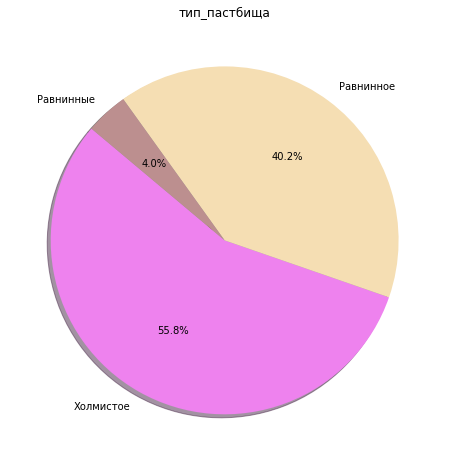

In [43]:
value_counts = df_ferma['тип_пастбища'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels = value_counts.index, colors=['violet', 'wheat', 'RosyBrown'], startangle=140, shadow=True, autopct='%1.1f%%')
plt.title('тип_пастбища')
plt.show()

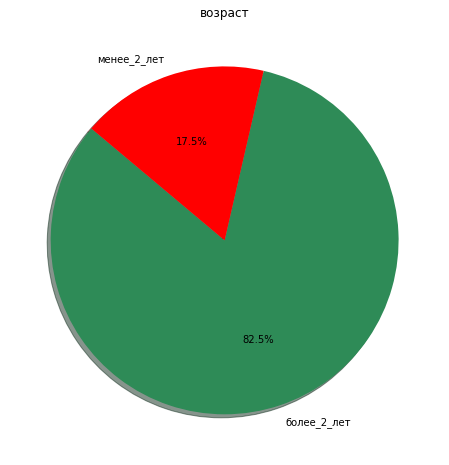

In [44]:
value_counts = df_ferma['возраст'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels = value_counts.index, colors=['SeaGreen', 'red'], startangle=140, shadow=True, autopct='%1.1f%%')
plt.title('возраст')
plt.show()

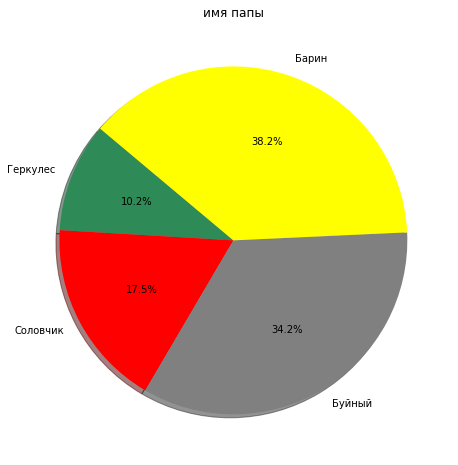

In [45]:
value_counts = df_ferma_dad['имя папы'].value_counts().sort_values()
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels = value_counts.index, colors=['SeaGreen', 'red', 'grey', 'yellow'], startangle=140, shadow=True, autopct='%1.1f%%')
plt.title('имя папы')
plt.show()

**По данным круговых диаграммам можно сделать вывод, что коровы, с наиболее популярной породой Висбикайдиал, с породой папы быка Соверин, именем папы "Барин", в  возрасте более 2-х лет пасутся в основном на холмистом пастбище и в основном их молоко вкусное** 

In [46]:
def set_columns(df_ferma):
    for column in df_ferma.columns:
        print(f'Уникальные значения столбца', column)
        print(df_ferma[column].sort_values().unique())

In [47]:
set_columns(df_ferma)

Уникальные значения столбца id
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239

**Проанализируем все столбцы по порядку начиная со столбца 'удой'**

**Найдем пропуски и аномальные значения**

In [48]:
df_ferma['удой, кг'].isna().sum()

0

**Пропусков в анном столбце нет. Найдем строку в толбце 'удой' со значением 45616 и выведем ее на экран**

In [49]:
df_ferma[df_ferma['удой, кг'] == 45616]

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиалл,3.22,3.076,вкусно,более_2_лет


**Отфильтруем данную строку**

In [50]:
df_ferma = df_ferma[df_ferma['удой, кг'] != 45616]
df_ferma

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,0.940,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет
625,626,5513,12.9,1700,0.880,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет
626,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
627,628,5746,13.8,1994,0.890,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет


In [51]:
df_ferma.head(20)

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинные,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


**Далее посмотрим столбец эке - энергетическа кормовая единица**

In [52]:
df_ferma['эке'].isna().sum()

0

**Пропусков нет. Посмотрим на статистику**

In [53]:
df_ferma['эке'].describe()

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: эке, dtype: float64

**Среднее значение - 14.54, минимальное - 10.9, макс-16.8. стандартное отклонение 1.3. Разброс небольшой**

**Следющий столбец - сахаро-протеиновое отношение (спо)**

In [54]:
df_ferma['спо'].isna().sum()

0

In [55]:
df_ferma['спо'].describe()

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: спо, dtype: float64

**Пропуски отсутствуют, среднее значение равно 0.91, мин - 0.84, макс-0.96**

**Далее посмотрим на столбец - процент жирности молока**

In [56]:
df_ferma['жирность,%'].isna().sum()

0

In [57]:
df_ferma['жирность,%'].describe()

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: жирность,%, dtype: float64

**Распределение нормальное без выбросов и аномалий. Среднее значение - 3.6, минимальное - 2.99, макс-3.75. Стандартное отклонение - 0.16**

In [58]:
df_ferma['белок,%'].isna().sum()

0

In [59]:
df_ferma['белок,%'].describe()

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: белок,%, dtype: float64

**среднее равно 3.07, минимальное = 3.06, макс=3.08. Стандартное отклонение - 0.002. Распределение нормальное без выбросов и аномалий**

**проанализируем следующую таблицу df_ferma_dad**

In [60]:
df_ferma_dad.head(20)

,id,имя папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


In [61]:
def set_columns(df_ferma_dad): # применим функцию вывода уникальных значений столбцов в отсортированном виде
    for column in df_ferma_dad.columns:
        print(f'Уникальные значения столбца', column)
        print(df_ferma_dad[column].sort_values().unique())

In [62]:
set_columns(df_ferma_dad)

Уникальные значения столбца id
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239

In [63]:
df_ferma_dad.columns.str.lower() # приведем названия колонок к нижнему регистру
   

Index(['id', 'имя папы'], dtype='object')

In [64]:
df_ferma_dad.isna().sum() # найдем пропуски в таблице методом isna

id          0
имя папы    0
dtype: int64

In [65]:
df_ferma_dad.duplicated().sum() # найдем явные дубликаты методом drop_duplicated

0

In [66]:
df_ferma_dad['имя папы'].describe() # посмотрим статистику колонки 'имя папы' с помощью метода describe()

count       629
unique        4
top       Барин
freq        240
Name: имя папы, dtype: object

**Вывод. В ходе исследовательского анализа данных, мы провели проверку на пропуски и дубликаты, посчитали их сумму. Нашли аномальное значение 45616 в столбце 'удой'. Посмотрели статистику по каждому столбцу, на средние значения, максимальные и минимальные. Построили графики отдельно по количественным и категориальным переменным. Посмотрели на распределение величин на графиках. В основном распределение количественных признаков нормальное, за исключением признаков 'белок' и 'жирность'. Там есть небольшие выбросы, после чего мы перешли к корелляционномуу анализу данных**

## Корреляционный анализ

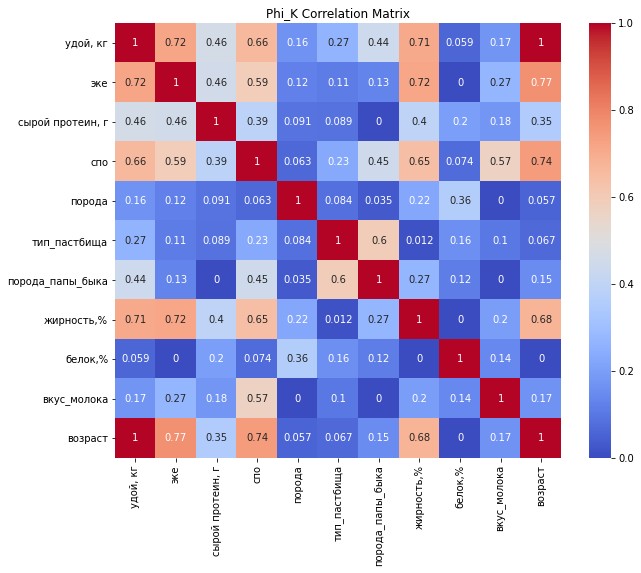

In [67]:
corr_matrix = df_ferma.drop(['id'], axis=1).phik_matrix(interval_cols = ['удой, кг' , 'эке', 'сырой протеин, г', 'спо', 'жирность,%', 'белок,%'])
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

**Построим матрицу корреляций с помощью коэффициента Спирмена**

In [68]:
df_ferma.drop(['id'], axis=1).corr(method='spearman')

,"удой, кг",эке,"сырой протеин, г",спо,"жирность,%","белок,%"
"удой, кг",1.000000,0.765144,0.437543,0.787904,0.688506,-0.005701
эке,0.765144,1.000000,0.384747,0.741962,0.686973,-0.013321
"сырой протеин, г",0.437543,0.384747,1.000000,0.485890,0.392822,0.229051
спо,0.787904,0.741962,0.485890,1.000000,0.701044,0.109924
"жирность,%",0.688506,0.686973,0.392822,0.701044,1.000000,0.043125
"белок,%",-0.005701,-0.013321,0.229051,0.109924,0.043125,1.000000


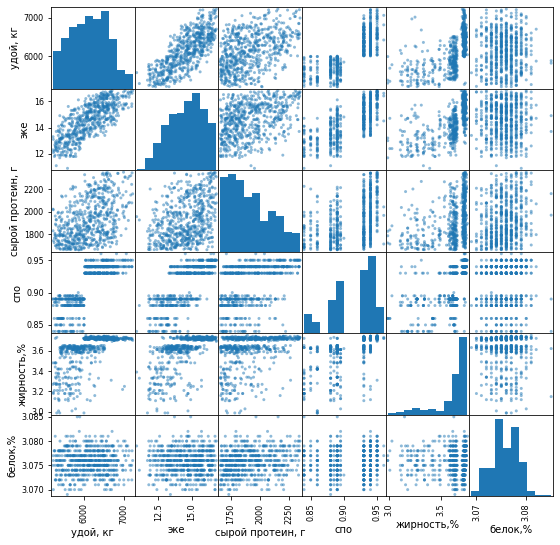

In [69]:
pd.plotting.scatter_matrix(df_ferma.drop(['id'], axis=1), figsize=(9, 9))
plt.show();

In [70]:
df_ferma['сырой протеин, г'].corr(df_ferma['удой, кг'], method='spearman')

0.43754251989802084

**Между удоем и сырым протеином наблюдается прямая связь**

In [71]:
df_ferma['эке'].corr(df_ferma['удой, кг'], method='spearman')

0.7651443116006692

**Между удоем и эке наблюдается прямая связь**

In [72]:
df_ferma['спо'].corr(df_ferma['удой, кг'], method='spearman')

0.7879040908519489

**прямая связь**

In [73]:
df_ferma['жирность,%'].corr(df_ferma['удой, кг'], method='spearman')

0.688505794761783

**Прямая связь**

In [74]:
df_ferma['белок,%'].corr(df_ferma['удой, кг'], method='spearman')

-0.0057008813839627215

**Связи нет**

**Связь отсутствует**

In [75]:
df_ferma

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,0.940,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет
625,626,5513,12.9,1700,0.880,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет
626,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
627,628,5746,13.8,1994,0.890,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет


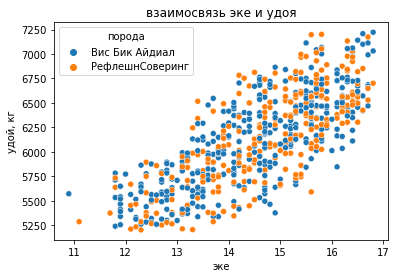

In [76]:
sns.scatterplot(data=df_ferma, x='эке', y='удой, кг', hue='порода')
plt.title('взаимосвязь эке и удоя')
plt.show();

**Прослеживается линейная зависимость между эке и удоем у двух разных пород одинаково**

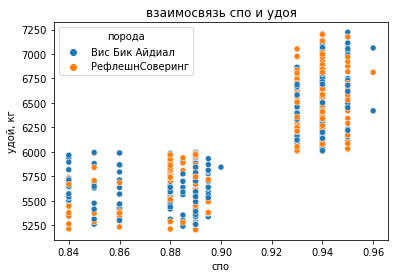

In [77]:
sns.scatterplot(data=df_ferma, x='спо', y='удой, кг', hue='порода')
plt.title('взаимосвязь спо и удоя');

**По графику взаимосвязи эке и удоя видим параболу, тоесть квадратичную зависимость. Поэтому добавим столбец 'эке в квадрате' в основной датафрейм**

In [78]:
df_ferma['эке в квадрате'] = df_ferma['эке'] ** 2 # добавим новый столбец 'эке в квадрате'. Для этого возведем столбец эке в квадрат


**По графику зависимости спо и удоя видим что спо похоже на категориальную переменную с границей 0,91. Добавим столбец и назовем его спо_категория.**

In [79]:
df_ferma['спо_категория'] = df_ferma['спо'].apply(lambda x: 'низкое' if x <0.91 else 'высокое')

**Прослеживается нелинейная зависимость между спо и удоем  у двух разных пород одинаково**

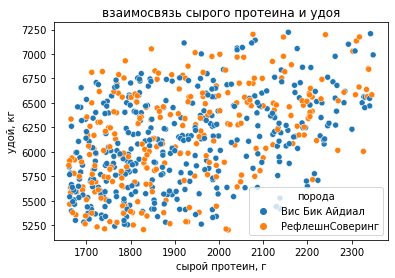

In [80]:
sns.scatterplot(data=df_ferma, x='сырой протеин, г', y='удой, кг', hue='порода')
plt.title('взаимосвязь сырого протеина и удоя');

**Прослеживается линейная зависимость между сырым протеином и удоем  у двух разных пород одинаково**

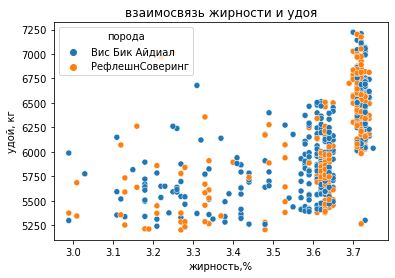

In [81]:
sns.scatterplot(data=df_ferma, x='жирность,%', y='удой, кг', hue='порода')
plt.title('взаимосвязь жирности и удоя');

**Прослеживается нелинейная зависимость между жирностью и удоем  у двух разных пород одинаково**

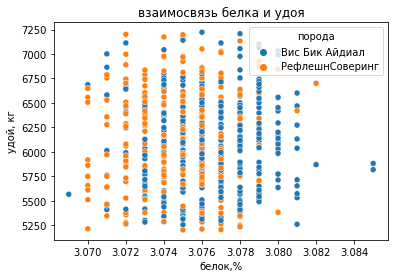

In [82]:
sns.scatterplot(data=df_ferma, x='белок,%', y='удой, кг', hue='порода')
plt.title('взаимосвязь белка и удоя');

**Прослеживается нелинейная зависимость между жирностью и удоем  у двух разных пород одинаково**

**Вывод: Мы провели корреляционный анализ данных между всеми признаками. Выясняли, что максимальная связь прослеживается между эке и удоем, спо и удоем. Чуть меньше связь между жирностью и удоем и между сырым протеином и удоем. Мы построили матрицу корреляций и диаграммы рассеяния, где обнаружили, что связь между эке и удоем нелинейная а также нелинейная связь между спо и удоем. Также увидели, что прослеживается мультиколлериантности между признаками нет.**

## Обучение модели линейной регрессии

**Известно, что удой коровы зависит от условий кормления и внешней среды а также от генотипа тоесть от породы коровы и породы папы быка. Возьмем признаки эке, спо, тип пастбища, порода, порода папы быка**

**Импортируем нужные методы для разделения выборки на тренировочную и тестовую и для обучения модели линейной регрессии из библиотеки sklearn а также метрики для оценки качества модели и матрицу ошибок**

In [83]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [84]:
df_ferma

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст,эке в квадрате,спо_категория
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64,низкое
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84,низкое
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00,низкое
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76,низкое
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84,низкое
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,0.940,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,237.16,высокое
625,626,5513,12.9,1700,0.880,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,166.41,низкое
626,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,207.36,низкое
627,628,5746,13.8,1994,0.890,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,190.44,низкое


[  -0.70437136  -81.32218259   51.18925512 -121.66423692 -275.20764363
 -215.19410542  160.9408721   162.15306373   52.56865736] 6292.507890849501


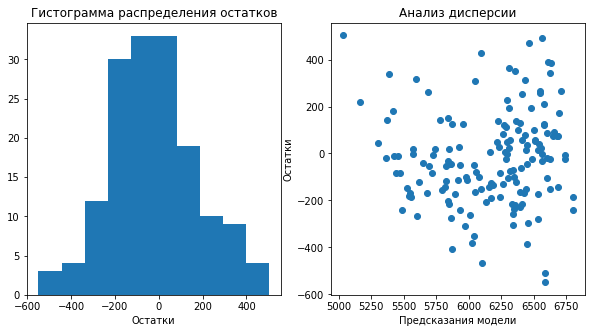

MAE LinearRegression = 157
R2 LinearRegression = 0.8043664892115381


In [85]:


X = df_ferma.drop(['удой, кг'], axis=1)
y = df_ferma['удой, кг']

RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
) 
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']
num_col_names = ['эке', 'спо', 'сырой протеин, г']

encoder = OneHotEncoder(drop='first', handle_unknown = 'ignore', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
encoder_col_names = encoder.get_feature_names_out(cat_col_names)
X_test_ohe = encoder.transform(X_test[cat_col_names])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
X_train_concat = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_concat = pd.concat([X_test_ohe, X_test_scaled], axis =1)

model1_lr = LinearRegression()
model1_lr.fit(X_train_concat, y_train)
predictions1 = model1_lr.predict(X_test_concat)
print(model1_lr.coef_, model1_lr.intercept_)
residuals = y_test - predictions1

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
axes[1].scatter(predictions1, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()
mae = mean_absolute_error(predictions1, y_test)
r2 = r2_score(y_test, predictions1)
print(f"MAE LinearRegression = {mae:.0f}")
print("R2 LinearRegression =", r2)


**Средняя абсолютная ошибка равна 156,61, что означает, что модель ошибается в реднем на 157 кг удоя при R2 равным 0,8 (тоесть близким к 1), это значит, что модель работает хорошо в 80 процентах случаев.**

**Анализ остатков показывает нормальное симметричное распределение, а значит ошибка стабильная на всех предсказаниях модели. Дисперсия постоянная а значит модель работает правильно.**

**Обучение второй модели**

In [86]:
df_ferma['эке в квадрате'] = df_ferma['эке'] ** 2 # добавим новый столбец 'эке в квадрате'. Для этого возведем столбец эке в квадрат


In [87]:
df_ferma['спо_категория'] = df_ferma['спо'].apply(lambda x: 'высокое' if x > 0.91 else 'низкое')
df_ferma

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст,эке в квадрате,спо_категория
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64,низкое
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84,низкое
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00,низкое
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76,низкое
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84,низкое
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,0.940,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,237.16,высокое
625,626,5513,12.9,1700,0.880,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,166.41,низкое
626,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,207.36,низкое
627,628,5746,13.8,1994,0.890,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,190.44,низкое


In [88]:
df_ferma_min['удой, кг'] = df_ferma['удой, кг'].fillna(df_ferma['удой, кг'].mean())
df_ferma_min

,порода,тип пастбища,порода папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,"удой, кг"
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет,5863.0
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет,5529.0
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет,5810.0
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет,5895.0
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет,5302.0
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет,5254.0
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет,5910.0
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет,6179.0
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет,6783.0
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет,5339.0


[   4.3968034   -87.92921418   31.01170557  -97.91726994 -241.90953268
 -207.14814708 -371.42224172  158.67525863   51.25704592] 6435.029925438252


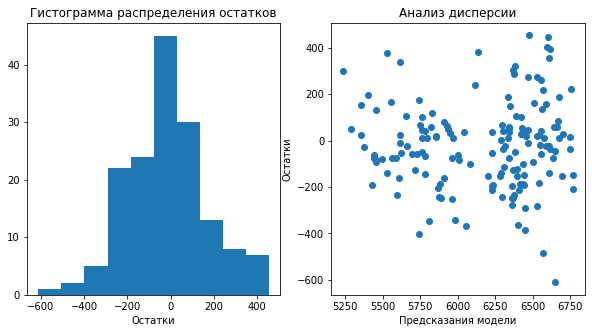

MAE LinearRegression = 144
R2 LinearRegression = 0.8267003148401033
[5964.68122879 5378.39530721 5765.3814987  5872.96319539 5248.93989206
 5398.12917342 5532.75145135 6326.85436313 6420.44221199 5466.74676711
 5715.81526473 6587.16795023 6405.52939238 6295.38746613 6485.16745678
 6327.68273478 5731.78453737 6435.45121928 5774.69783228 6487.36713573
 6379.31652037 6331.83157433 6184.38949729 5444.71104876 6296.30931971
 6391.30354519 6714.66355173 6319.16869749 6594.7147646  5432.79880469
 6367.94717424 6475.7113891  6623.76815489 5420.28936837 6565.07684092
 6210.40342131 6301.72408865 5674.80126418 6539.51467304 6340.52875355
 6447.4609636  6230.70017322 5962.88335924 6637.01120023 5781.97372982
 6712.72999541 6529.28577645 6501.34720216 6582.81895134 5459.36435597
 6250.38957763 5393.85095544 5788.17411952 5683.81067291 5523.61857578
 5892.18431247 6557.71139624 6488.40202408 6579.25987367 6663.77610992
 5616.38362231 6609.21222173 6355.72915923 6632.34231414 6465.01927595
 6485.565

In [89]:

X = df_ferma.drop('удой, кг', axis=1)
y = df_ferma['удой, кг']

RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
) 
num_col_names = ['эке в квадрате', 'сырой протеин, г']
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_категория']
encoder = OneHotEncoder(drop='first', handle_unknown = 'ignore', sparse_output=False) 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()
X_test_ohe = encoder.transform(X_test[cat_col_names])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
X_train_concat = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_concat = pd.concat([X_test_ohe, X_test_scaled], axis =1)

model2_lr = LinearRegression()
model2_lr.fit(X_train_concat, y_train)
predictions2 = model2_lr.predict(X_test_concat)
print(model2_lr.coef_, model2_lr.intercept_)
residuals = y_test - predictions2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions2, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()
mae = mean_absolute_error(predictions2, y_test)
r2 = r2_score(y_test, predictions2)
print(f"MAE LinearRegression = {mae:.0f}")
print("R2 LinearRegression =", r2)
X_udoy = df_ferma[['эке в квадрате', 'сырой протеин, г', 'порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_категория']]
X_udoy_ohe=encoder.transform(X_udoy[cat_col_names])
encoder_col_names = encoder.get_feature_names_out(cat_col_names)

X_udoy_scaled = scaler.transform(X_udoy[num_col_names])
X_udoy_ohe = pd.DataFrame(X_udoy_ohe, columns=encoder_col_names)
X_udoy_scaled = pd.DataFrame(X_udoy_scaled, columns=num_col_names)
X_udoy_concat = pd.concat([X_udoy_ohe, X_udoy_scaled], axis=1)
predictions_udoy = model2_lr.predict(X_udoy_concat)
print(predictions_udoy)
df_ferma_min.reset_index(drop=True)
for i in range(len(df_ferma_min['удой, кг'])):
    df_ferma_min['i', 'удой, кг'] = predictions_udoy[i]
    
print(df_ferma_min.sort_values(by='удой, кг', ascending=False))

**Средняя абсолютная ошибка равна 143,91, что означает, что модель ошибается в реднем на 143,91 кг удоя при R2 равным 0,83(тоесть близким к 1), это значит, что модель работает хорошо в 83 процентах случаев.**

**Анализ остатков показывает нормальное симметричное распределение, а значит ошибка стабильная на всех предсказаниях модели. Дисперсия постоянная а значит модель работает правильно.**

**Обучим третью модель с учетом нового входного признака 'имя папы'**

In [90]:
df_ferma_dad.head()

,id,имя папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [91]:
df_ferma['имя папы'] = df_ferma_dad['имя папы']
df_ferma.head()

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст,эке в квадрате,спо_категория,имя папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64,низкое,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84,низкое,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00,низкое,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76,низкое,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84,низкое,Барин


[   4.3968034   -87.92921418   31.01170557  -97.91726994 -241.90953268
 -207.14814708 -371.42224172  158.67525863   51.25704592] 6435.029925438252


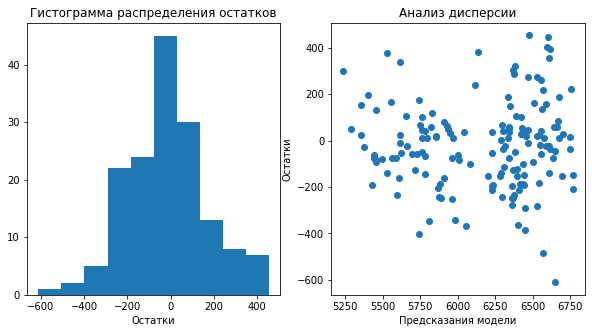

MAE LinearRegression = 144
R2 LinearRegression = 0.8267003148401033


In [92]:
X = df_ferma.drop('удой, кг', axis=1)
y = df_ferma['удой, кг']

RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
) 
num_col_names = ['эке в квадрате', 'сырой протеин, г']
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_категория']
encoder = OneHotEncoder(drop='first', handle_unknown = 'ignore', sparse_output=False) 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
encoder_col_names = encoder.get_feature_names_out(cat_col_names)
X_test_ohe = encoder.transform(X_test[cat_col_names])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
X_train_concat = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_concat = pd.concat([X_test_ohe, X_test_scaled], axis =1)

model3_lr = LinearRegression()
model3_lr.fit(X_train_concat, y_train)
predictions3 = model3_lr.predict(X_test_concat)
print(model3_lr.coef_, model3_lr.intercept_)
residuals = y_test - predictions3

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions3, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()
mae = mean_absolute_error(predictions3, y_test)
r2 = r2_score(y_test, predictions3)

print(f"MAE LinearRegression = {mae:.0f}")
print("R2 LinearRegression =", r2)

**Средняя абсолютная ошибка равна 149, что означает, что модель ошибается в среднем на 149 кг удоя при R2 равным 0,82(тоесть близким к 1), это значит, что модель работает хорошо в 82 процентах случаев.**

**Анализ остатков показывает нормальное распределение влево с небольшими выбросами от -500 до -800. Дисперсия постоянная а значит модель работает правильно.**

**Сравнивая три модели по их остаткам и R2, можно порекомендовать вторую модель с меньшей абсолютной ошибкой MAE из трех моделей = 144кг удоя в год и с r2 равным 0.83**

In [93]:
def mean_squared_error(y_test, predictions1):
    return np.mean((y_test - predictions1) ** 2)
    

In [94]:
def mean_absolute_error(y_test, predictions1):
    return np.mean(np.abs(y_test - predictions1))

In [95]:
def root_mean_squared_error(y_test, predictions1):
    mse = mean_squared_error(y_test, predictions1)
    return np.sqrt(mse)

In [96]:
print("MAE1 =", mean_absolute_error(y_test, predictions1))
print("MSE1 =", mean_squared_error(y_test, predictions1))
print("RMSE1 =", root_mean_squared_error(y_test, predictions1))


MAE1 = 156.61201174113506
MSE1 = 39824.12867897711
RMSE1 = 199.5598373395236


In [97]:
print("MAE2 =", mean_absolute_error(y_test, predictions2))
print("MSE2 =", mean_squared_error(y_test, predictions2))
print("RMSE2 =", root_mean_squared_error(y_test, predictions2))



MAE2 = 143.91788906903162
MSE2 = 35277.74425771327
RMSE2 = 187.82370526031391


In [98]:
print("MAE3 =", mean_absolute_error(y_test, predictions3))
print("MSE3 =", mean_squared_error(y_test, predictions3))
print("RMSE3 =", root_mean_squared_error(y_test, predictions3))

MAE3 = 143.91788906903162
MSE3 = 35277.74425771327
RMSE3 = 187.82370526031391


**Из полученных данных мы выбираем вторю модель, где меньше всего средняя квадратиччная ошибка MSE = 35277.74, средняя абсолютная ошибка MAE = 143.92 кг удоя и корень из средней квадратичной ошибки RMSE = 192.65 кг по сравнению с другими двумя моделями.**

In [99]:
import numpy as np
import scipy.stats as st

In [100]:
np.quantile(predictions2, 0.025), np.quantile(predictions2, 0.975)

(5373.38942261757, 6747.751646495149)

c 95%-й вероятностью модель прогнозирует удой от 5373 до 6747 кг

**Тоесть можно сказать что, с вероятностью 95% среднее значение ошибки будет лежать в интервале от -0.09 до 0.09**

In [101]:
df_ferma['удой, кг'].mean()

6125.968152866242

In [102]:
df_ferma['эке в квадрате'] = df_ferma['эке'].mean() * 1.05

In [103]:
df_ferma['спо'] = df_ferma['спо'].mean() * 1.05

In [104]:
df_ferma['сырой протеин, г'] = df_ferma['сырой протеин, г'].mean() * 1.05


In [105]:
df_ferma

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст,эке в квадрате,спо_категория,имя папы
0,1,5863,14.2,2019.947532,0.958744,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,15.276162,низкое,Буйный
1,2,5529,12.8,2019.947532,0.958744,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет,15.276162,низкое,Соловчик
2,3,5810,14.0,2019.947532,0.958744,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,15.276162,низкое,Барин
3,4,5895,12.4,2019.947532,0.958744,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,15.276162,низкое,Буйный
4,5,5302,12.8,2019.947532,0.958744,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет,15.276162,низкое,Барин
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,2019.947532,0.958744,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,15.276162,высокое,Буйный
625,626,5513,12.9,2019.947532,0.958744,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,15.276162,низкое,Барин
626,627,5970,14.4,2019.947532,0.958744,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,15.276162,низкое,Барин
627,628,5746,13.8,2019.947532,0.958744,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,15.276162,низкое,Барин


In [106]:
df_ferma_min.columns = df_ferma_min.columns.str.lower()

In [107]:
df_ferma_min['текущая_жирность,%'] = df_ferma_min['текущая_жирность,%'].str.replace(',','.').astype(float)

In [108]:
df_ferma_min['текущий_уровень_белок,%'] = df_ferma_min['текущий_уровень_белок,%'].str.replace(',', '.').astype(float)


In [109]:
df_ferma_min.loc[df_ferma_min['удой, кг'].isna(), 'удой, кг'] = df_ferma_min['удой, кг'].mean() # заполним пропуск в колонке 'удой' на среднее значение

In [110]:
df_ferma_min = df_ferma_min.rename(columns={'тип пастбища': 'тип_пастбища', 'порода папы_быка': 'порода_папы_быка'})
df_ferma_min

,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,"удой, кг",NaN
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,5863.000000,6487.367136
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,5529.000000,6487.367136
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,5810.000000,6487.367136
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,5895.000000,6487.367136
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,5302.000000,6487.367136
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,5254.000000,6487.367136
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,5910.000000,6487.367136
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6179.000000,6487.367136
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6783.000000,6487.367136
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,5339.000000,6487.367136


In [112]:
df_ferma

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст,эке в квадрате,спо_категория,имя папы
0,1,5863,14.2,2019.947532,0.958744,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,15.276162,низкое,Буйный
1,2,5529,12.8,2019.947532,0.958744,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет,15.276162,низкое,Соловчик
2,3,5810,14.0,2019.947532,0.958744,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,15.276162,низкое,Барин
3,4,5895,12.4,2019.947532,0.958744,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,15.276162,низкое,Буйный
4,5,5302,12.8,2019.947532,0.958744,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет,15.276162,низкое,Барин
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,2019.947532,0.958744,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,15.276162,высокое,Буйный
625,626,5513,12.9,2019.947532,0.958744,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,15.276162,низкое,Барин
626,627,5970,14.4,2019.947532,0.958744,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,15.276162,низкое,Барин
627,628,5746,13.8,2019.947532,0.958744,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,15.276162,низкое,Барин


In [113]:
df_ferma_min

,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,"удой, кг",NaN
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,5863.000000,6487.367136
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,5529.000000,6487.367136
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,5810.000000,6487.367136
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,5895.000000,6487.367136
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,5302.000000,6487.367136
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,5254.000000,6487.367136
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,5910.000000,6487.367136
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6179.000000,6487.367136
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6783.000000,6487.367136
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,5339.000000,6487.367136


## Обучение модели логистической регрессии

In [114]:
df_ferma.head()

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст,эке в квадрате,спо_категория,имя папы
0,1,5863,14.2,2019.947532,0.958744,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,15.276162,низкое,Буйный
1,2,5529,12.8,2019.947532,0.958744,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет,15.276162,низкое,Соловчик
2,3,5810,14.0,2019.947532,0.958744,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,15.276162,низкое,Барин
3,4,5895,12.4,2019.947532,0.958744,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,15.276162,низкое,Буйный
4,5,5302,12.8,2019.947532,0.958744,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет,15.276162,низкое,Барин


In [115]:
df_ferma['вкус_класс'] = df_ferma['вкус_молока'].apply(lambda x: 1 if x == 'вкусно' else 0) # добавим бинаный столбец вкус молока
df_ferma


,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст,эке в квадрате,спо_категория,имя папы,вкус_класс
0,1,5863,14.2,2019.947532,0.958744,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,15.276162,низкое,Буйный,1
1,2,5529,12.8,2019.947532,0.958744,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет,15.276162,низкое,Соловчик,1
2,3,5810,14.0,2019.947532,0.958744,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,15.276162,низкое,Барин,0
3,4,5895,12.4,2019.947532,0.958744,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,15.276162,низкое,Буйный,0
4,5,5302,12.8,2019.947532,0.958744,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет,15.276162,низкое,Барин,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,2019.947532,0.958744,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,15.276162,высокое,Буйный,0
625,626,5513,12.9,2019.947532,0.958744,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,15.276162,низкое,Барин,1
626,627,5970,14.4,2019.947532,0.958744,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,15.276162,низкое,Барин,0
627,628,5746,13.8,2019.947532,0.958744,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,15.276162,низкое,Барин,1


In [116]:
df_ferma_min['вкус_молока'] = df_ferma['вкус_молока']
df_ferma_min


,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,"удой, кг",NaN,вкус_молока
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,5863.000000,6487.367136,вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,5529.000000,6487.367136,вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,5810.000000,6487.367136,не вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,5895.000000,6487.367136,не вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,5302.000000,6487.367136,вкусно
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,5254.000000,6487.367136,вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,5910.000000,6487.367136,вкусно
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6179.000000,6487.367136,вкусно
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6783.000000,6487.367136,вкусно
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,5339.000000,6487.367136,вкусно


In [117]:
df_ferma_min['вкус_класс'] = df_ferma_min['вкус_молока'].apply(lambda x: 1 if x == 'вкусно' else 0)
df_ferma_min

,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,"удой, кг",NaN,вкус_молока,вкус_класс
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,5863.000000,6487.367136,вкусно,1
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,5529.000000,6487.367136,вкусно,1
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,5810.000000,6487.367136,не вкусно,0
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,5895.000000,6487.367136,не вкусно,0
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,5302.000000,6487.367136,вкусно,1
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,5254.000000,6487.367136,вкусно,1
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,5910.000000,6487.367136,вкусно,1
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6179.000000,6487.367136,вкусно,1
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6783.000000,6487.367136,вкусно,1
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,5339.000000,6487.367136,вкусно,1


In [118]:
df_ferma_min = df_ferma_min.drop(df_ferma_min.index[-1])
df_ferma_min

,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,"удой, кг",NaN,вкус_молока,вкус_класс
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,5863.000000,6487.367136,вкусно,1
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,5529.000000,6487.367136,вкусно,1
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,5810.000000,6487.367136,не вкусно,0
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,5895.000000,6487.367136,не вкусно,0
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,5302.000000,6487.367136,вкусно,1
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,5254.000000,6487.367136,вкусно,1
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,5910.000000,6487.367136,вкусно,1
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6179.000000,6487.367136,вкусно,1
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6783.000000,6487.367136,вкусно,1
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,5339.000000,6487.367136,вкусно,1


In [119]:
df_ferma['вкус_класс'] = df_ferma['вкус_молока'].apply(lambda x: 1 if x == 'вкусно' else 0) # добавим бинаный столбец вкус молока
df_ferma

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст,эке в квадрате,спо_категория,имя папы,вкус_класс
0,1,5863,14.2,2019.947532,0.958744,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,15.276162,низкое,Буйный,1
1,2,5529,12.8,2019.947532,0.958744,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет,15.276162,низкое,Соловчик,1
2,3,5810,14.0,2019.947532,0.958744,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,15.276162,низкое,Барин,0
3,4,5895,12.4,2019.947532,0.958744,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,15.276162,низкое,Буйный,0
4,5,5302,12.8,2019.947532,0.958744,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет,15.276162,низкое,Барин,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,2019.947532,0.958744,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,15.276162,высокое,Буйный,0
625,626,5513,12.9,2019.947532,0.958744,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,15.276162,низкое,Барин,1
626,627,5970,14.4,2019.947532,0.958744,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,15.276162,низкое,Барин,0
627,628,5746,13.8,2019.947532,0.958744,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,15.276162,низкое,Барин,1


[[0.49260772 0.50739228]
 [0.62696212 0.37303788]
 [0.32021976 0.67978024]
 ...
 [0.32021976 0.67978024]
 [0.46255841 0.53744159]
 [0.28843759 0.71156241]]


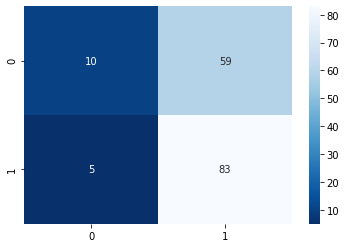

In [120]:
RANDOM_STATE = 42
X_regr = df_ferma.drop(['id', 'спо', 'жирность,%', 'белок,%', 'удой, кг', 'вкус_молока', 'вкус_класс'], axis=1)
y_regr = df_ferma['вкус_класс']
X_regr_train, X_regr_test, y_regr_train, y_regr_test = train_test_split(
X_regr,
y_regr,
random_state=RANDOM_STATE
) 
num_col_names = ['эке в квадрате', 'сырой протеин, г']
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_категория']

encoder = OneHotEncoder(drop='first', handle_unknown = 'ignore', sparse_output=False)

X_regr_train_ohe = encoder.fit_transform(X_regr_train[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()

X_regr_train_scaled = scaler.fit_transform(X_regr_train[num_col_names])


X_regr_train_ohe  = pd.DataFrame(X_regr_train_ohe, columns=encoder_col_names)
X_regr_train_scaled = pd.DataFrame(X_regr_train_scaled, columns=num_col_names)

X_regr_train_concat = pd.concat([X_regr_train_ohe, X_regr_train_scaled], axis=1)

X_regr_test_ohe = encoder.transform(X_regr_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()
X_regr_test_scaled = scaler.transform(X_regr_test[num_col_names])

X_regr_test_ohe = pd.DataFrame(X_regr_test_ohe, columns=encoder_col_names)
X_regr_test_scaled = pd.DataFrame(X_regr_test_scaled, columns=num_col_names)
X_regr_test_concat = pd.concat([X_regr_test_ohe, X_regr_test_scaled], axis=1)

clf = LogisticRegression()
clf = clf.fit(X_regr_train_concat, y_regr_train)
predictions_log = clf.predict(X_regr_test_concat)


cm = confusion_matrix(y_regr_test, predictions_log)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues_r')
X_taste = df_ferma[['эке в квадрате', 'сырой протеин, г', 'порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_категория']]
X_taste_ohe=encoder.transform(X_taste[cat_col_names])
encoder_col_names = encoder.get_feature_names_out(cat_col_names)

X_taste_scaled = scaler.transform(X_taste[num_col_names])
X_taste_ohe = pd.DataFrame(X_taste_ohe, columns=encoder_col_names)
X_taste_scaled = pd.DataFrame(X_taste_scaled, columns=num_col_names)
X_taste_concat = pd.concat([X_taste_ohe, X_taste_scaled], axis=1)
predictions_taste = clf.predict_proba(X_taste_concat)
print(predictions_taste)




**Модель неправильно предсказывает целевой показатель в 59
случаях**

In [121]:
recall = recall_score(y_regr_test, predictions_log)

In [122]:
precision = precision_score(y_regr_test, predictions_log)

In [123]:
print('Уровень recall: ', round(recall, 3))
print('Уровень precision: ', round(precision, 3))

Уровень recall:  0.943
Уровень precision:  0.585


In [124]:
df_ferma

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст,эке в квадрате,спо_категория,имя папы,вкус_класс
0,1,5863,14.2,2019.947532,0.958744,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,15.276162,низкое,Буйный,1
1,2,5529,12.8,2019.947532,0.958744,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет,15.276162,низкое,Соловчик,1
2,3,5810,14.0,2019.947532,0.958744,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,15.276162,низкое,Барин,0
3,4,5895,12.4,2019.947532,0.958744,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,15.276162,низкое,Буйный,0
4,5,5302,12.8,2019.947532,0.958744,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет,15.276162,низкое,Барин,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,2019.947532,0.958744,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,15.276162,высокое,Буйный,0
625,626,5513,12.9,2019.947532,0.958744,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,15.276162,низкое,Барин,1
626,627,5970,14.4,2019.947532,0.958744,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,15.276162,низкое,Барин,0
627,628,5746,13.8,2019.947532,0.958744,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,15.276162,низкое,Барин,1


In [125]:
cow = df_ferma_min.loc[( df_ferma_min['удой, кг'] > 6000)&( df_ferma_min['удой, кг'] < 45616)&(df_ferma_min['вкус_молока'] == 'вкусно')]
cow 


,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,"удой, кг",NaN,вкус_молока,вкус_класс
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6179.0,6487.367136,вкусно,1
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6783.0,6487.367136,вкусно,1
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,6563.0,6487.367136,вкусно,1
12,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,6173.0,6487.367136,вкусно,1
15,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,6518.0,6487.367136,вкусно,1


**Вывод: Мы рекомендуем фермеру купить вот этих 5 коров с заданными им параметрами**

In [127]:
pd.DataFrame(zip(y_test, predictions_log), columns = ['test','pred']).head(10) 

,test,pred
0,5980,1
1,6512,1
2,5392,1
3,5604,1
4,5667,1
5,6498,1
6,6376,1
7,6037,1
8,6618,1
9,5340,0


**Уровень precision в 0,61 означает долю обьектов, предсказанных моделью положительными, в нашем слчае -  долю обьектов  с вкусным молоком**

**Уровень recall равен 0,86, означает, что доля обьектов положительного класса из всех положительных классов, которые нашла наша модель, равна 0,86**

**Или по другому можно сказать, что уровень recall выше чем precision и модель эфективнее избегает ошибок второго рода**

**Считаю, что более важной ошибкой являетя precision, так как фермер может недополуучить прибыль из за такого низкого значения precision в 0.61**

In [128]:
y_proba = clf.predict_proba(X_regr_test_concat)[:,1]

data = pd.DataFrame(zip(y_regr_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

print(data.head())

     y_valid  y_proba
13         1  0.74159
72         1  0.74159
152        1  0.74159
41         0  0.74159
66         1  0.74159


In [130]:
thresholds = [round(i,2) for i in np.linspace(0.5,1,num=4,endpoint=False)]

In [131]:
columns = []
for i in thresholds:
    columns.append('y_pred_' + str(i))
    data['y_pred_' + str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)
    
print(data.sample(5))

     y_valid   y_proba  y_pred_0.5  y_pred_0.62  y_pred_0.75  y_pred_0.88
155        0  0.580658           1            0            0            0
95         1  0.711562           1            1            0            0
137        0  0.568591           1            0            0            0
60         1  0.358510           0            0            0            0
129        1  0.538829           1            0            0            0


In [132]:
recall1 = recall_score(y_regr_test, data['y_pred_0.5'])
recall1

0.9204545454545454

In [133]:
recall2 = recall_score(data['y_valid'], data['y_pred_0.62'])
recall2

0.6022727272727273

In [134]:
recall3 = recall_score(data['y_valid'], data['y_pred_0.75'])
recall3

0.0

In [135]:
recall4 = recall_score(data['y_valid'], data['y_pred_0.88'])
recall4

0.0

In [136]:
precision1 = precision_score(y_regr_test, data['y_pred_0.5'])
precision1

0.5704225352112676

In [137]:
precision2 = precision_score(data['y_valid'], data['y_pred_0.62'])
precision2

0.6385542168674698

In [138]:
precision3 = precision_score(data['y_valid'], data['y_pred_0.75'])
precision3

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0

In [139]:
precision4 = precision_score(data['y_valid'], data['y_pred_0.88'])
precision4

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0

In [140]:
thresholds = [round(i,2) for i in np.linspace(0.7,1,num=4,endpoint=False)] # понизим порог ложноотрицательной ошибки до 0.3

In [141]:
columns = []
for i in thresholds:
    columns.append('y_pred_' + str(i))
    data['y_pred_' + str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)
    
print(data.sample(5))

    y_valid   y_proba  y_pred_0.5  y_pred_0.62  y_pred_0.75  y_pred_0.88  \
63        0  0.736932           1            1            0            0   
57        0  0.675722           1            1            0            0   
74        0  0.680994           1            1            0            0   
29        0  0.537442           1            0            0            0   
32        1  0.532819           1            0            0            0   

    y_pred_0.7  y_pred_0.77  y_pred_0.85  y_pred_0.92  
63           1            0            0            0  
57           0            0            0            0  
74           0            0            0            0  
29           0            0            0            0  
32           0            0            0            0  


In [142]:
recall1 = recall_score(y_regr_test, data['y_pred_0.7'])
recall1

0.3409090909090909

In [143]:
recall2 = recall_score(data['y_valid'], data['y_pred_0.77'])
recall2

0.0

In [144]:
recall3 = recall_score(data['y_valid'], data['y_pred_0.85'])
recall3

0.0

In [145]:
recall4 = recall_score(data['y_valid'], data['y_pred_0.92'])
recall4

0.0

In [146]:
precision1 = precision_score(y_regr_test, data['y_pred_0.7'])
precision1

0.7142857142857143

In [147]:
precision2 = precision_score(data['y_valid'], data['y_pred_0.77'])
precision2

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0

In [148]:
precision3 = precision_score(data['y_valid'], data['y_pred_0.85'])
precision3

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0

In [149]:
precision4 = precision_score(data['y_valid'], data['y_pred_0.92'])
precision4

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0

**Можно сделать вывод, что оптимальный порог 0.85 , при котором recall понизилась  до 0.02 а precision повысилось c  до 1. Теперь мы можем утверждать, что главное условие фермера о том, что молоко должно быть вкусным, выполнено и все отобранные нашей моделью коровы будут давать вкусное молоко.**

In [150]:
df_ferma_min

,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,"удой, кг",NaN,вкус_молока,вкус_класс
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,5863.000000,6487.367136,вкусно,1
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,5529.000000,6487.367136,вкусно,1
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,5810.000000,6487.367136,не вкусно,0
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,5895.000000,6487.367136,не вкусно,0
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,5302.000000,6487.367136,вкусно,1
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,5254.000000,6487.367136,вкусно,1
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,5910.000000,6487.367136,вкусно,1
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6179.000000,6487.367136,вкусно,1
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6783.000000,6487.367136,вкусно,1
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,5339.000000,6487.367136,вкусно,1


**Вывод: Исходя из прогноза нашей модели и с учетом требований фермера мы можем рекомендовать фермеру купить 5 коров с характеристиками из таблицы df_cow и по заданным критериям**

In [151]:
эdf_cow = df_ferma_min[(df_ferma_min['удой, кг'] > 6000)&(df_ferma_min['вкус_молока'] == 'вкусно')]
df_cow


,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,"удой, кг",NaN,вкус_молока,вкус_класс
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6179.0,6487.367136,вкусно,1
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6783.0,6487.367136,вкусно,1
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,6563.0,6487.367136,вкусно,1
12,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,6173.0,6487.367136,вкусно,1
15,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,6518.0,6487.367136,вкусно,1


**Можно сделать вывод, что оптимальный порог 0.85 , при котором recall понизилась до 0.02 а precision повысилось   до 1. Теперь мы можем утверждать, что главное условие фермера о том, что молоко должно быть вкусным, выполнено и все отобранные нашей моделью коровы будут давать вкусное молоко.**

**При анализе рисков или экономических расчётов, важны метрики моделей классификации, в том числе логистической регрессии, такие как precision и recall. Например для правильного предсказания дефолта клиента при выдаче ему кредита, важна метрика recall, чтобы минимизировать риск выдаи кредитов дефолтным клиентам и соответственно снизить убытки банка. Precision же важна для того, чтобы не упустить выгодных клиентов и выдать кредит только тем, кто точно может его вернуть. Это поможет банку заработать на процентах и соответственно увеличить потенциальную прибыль.**